### Import Statements

In [62]:
import os
import sys
import warnings

sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.load_data import PostgresDBUtils
from scripts.data_cleaner import DataCleaner

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [63]:
pgu = PostgresDBUtils()
df = pgu.db_execute_fetch(table_name='ads_data_joined')

423812 records fetched from ads_data_joined table


In [64]:
df.head()

,campaign_id,campaign_name,submission_date,description,campaign_objectives,kpis,placements,start_date,end_date,serving_locations,...,platform_os,device_type,browser,labels,text,colors,video_data,eng_type,direction,adunit_size
0,l5kk3r3,FACEBOOK_CONVERSATIONAL COMMERCE_2020_09_TH,18/06/2021 03:18,Storyboard Due Date :\r\nAs determined by camp...,Brand Awareness\nProduct Awareness\nMessage Re...,Engagement Rate,320x480 (Fullscreen mobile / interstitial)\n30...,12/07/2021,08/09/2021,Singapore,...,6,Mobile,Chrome,None,None,None,None,None,None,None
1,l5kk3r3,FACEBOOK_CONVERSATIONAL COMMERCE_2020_09_TH,18/06/2021 03:18,Storyboard Due Date :\r\nAs determined by camp...,Brand Awareness\nProduct Awareness\nMessage Re...,Engagement Rate,320x480 (Fullscreen mobile / interstitial)\n30...,12/07/2021,08/09/2021,Singapore,...,6,Mobile,Mobile Safari UI/WKWebView,None,None,None,None,None,None,None
2,l5kk3r3,FACEBOOK_CONVERSATIONAL COMMERCE_2020_09_TH,18/06/2021 03:18,Storyboard Due Date :\r\nAs determined by camp...,Brand Awareness\nProduct Awareness\nMessage Re...,Engagement Rate,320x480 (Fullscreen mobile / interstitial)\n30...,12/07/2021,08/09/2021,Singapore,...,6,Mobile,Chrome Mobile,None,None,None,None,None,None,None
3,l5kk3r3,FACEBOOK_CONVERSATIONAL COMMERCE_2020_09_TH,18/06/2021 03:18,Storyboard Due Date :\r\nAs determined by camp...,Brand Awareness\nProduct Awareness\nMessage Re...,Engagement Rate,320x480 (Fullscreen mobile / interstitial)\n30...,12/07/2021,08/09/2021,Singapore,...,6,Mobile,Mobile Safari,None,None,None,None,None,None,None
4,l5kk3r3,FACEBOOK_CONVERSATIONAL COMMERCE_2020_09_TH,18/06/2021 03:18,Storyboard Due Date :\r\nAs determined by camp...,Brand Awareness\nProduct Awareness\nMessage Re...,Engagement Rate,320x480 (Fullscreen mobile / interstitial)\n30...,12/07/2021,08/09/2021,Singapore,...,6,Mobile,Chrome,None,None,None,None,None,None,None


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423812 entries, 0 to 423811
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   campaign_id                         422828 non-null  object 
 1   campaign_name                       422828 non-null  object 
 2   submission_date                     422828 non-null  object 
 3   description                         422828 non-null  object 
 4   campaign_objectives                 422828 non-null  object 
 5   kpis                                422828 non-null  object 
 6   placements                          422828 non-null  object 
 7   start_date                          422828 non-null  object 
 8   end_date                            422828 non-null  object 
 9   serving_locations                   422828 non-null  object 
 10  black_white_audience_list_included  422828 non-null  object 
 11  delivery_requirements     

In [66]:
# columns with null values
df.isna().any()

campaign_id                           True
campaign_name                         True
submission_date                       True
description                           True
campaign_objectives                   True
kpis                                  True
placements                            True
start_date                            True
end_date                              True
serving_locations                     True
black_white_audience_list_included    True
delivery_requirements                 True
cost_centre                           True
currency                              True
buy_rate                              True
volume_agreed                         True
gross_cost                            True
agency_fee                            True
percentage                            True
flat_fee                              True
net_cost                              True
type                                  True
width                                 True
height     

In [67]:
# total number of null values in a columns
df.isna().sum()

campaign_id                              984
campaign_name                            984
submission_date                          984
description                              984
campaign_objectives                      984
kpis                                     984
placements                               984
start_date                               984
end_date                                 984
serving_locations                        984
black_white_audience_list_included       984
delivery_requirements                 373763
cost_centre                              984
currency                                 984
buy_rate                               11509
volume_agreed                          11509
gross_cost                             11503
agency_fee                               989
percentage                             31274
flat_fee                              423812
net_cost                                 989
type                                    1021
width     

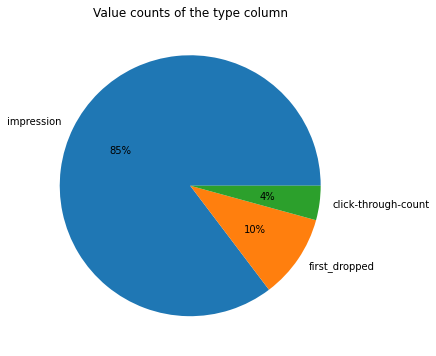

In [68]:
plt.figure(figsize=(12, 6))
plt.pie(df['type'].value_counts(), labels=["impression", "first_dropped", 'click-through-count'], autopct='%.0f%%')
plt.title('Value counts of the type column')
plt.show()

In [69]:
# counting the type of device being used
top_device_types = df['device_type'].value_counts().nlargest(n=4)
top_device_types

Mobile    388085
Tablet     29362
PC          5334
Other          2
Name: device_type, dtype: int64

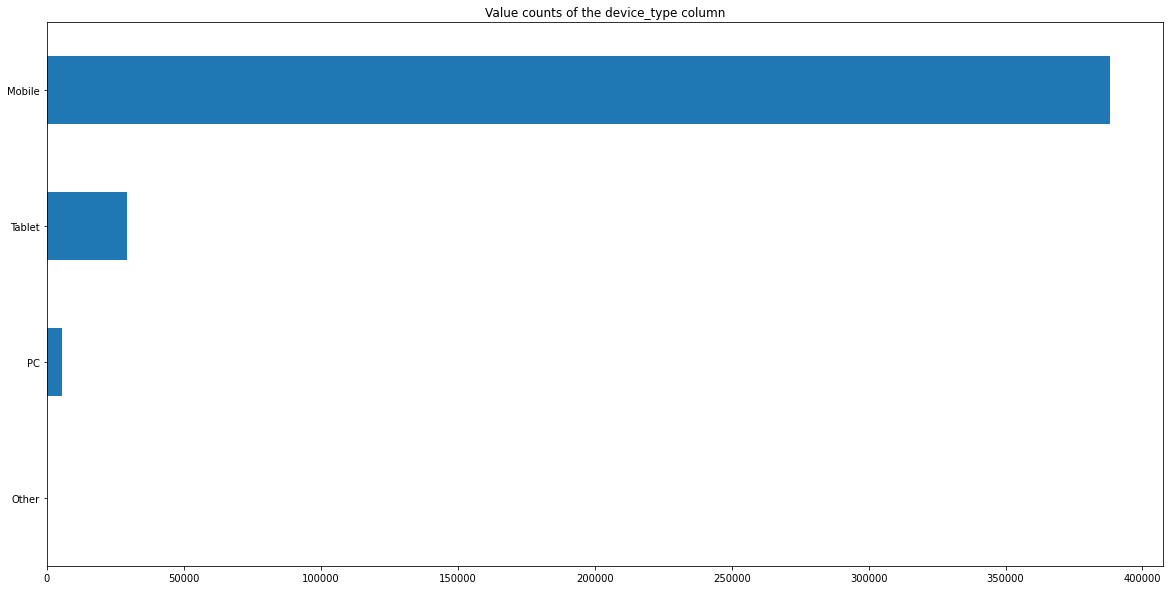

In [70]:
# device count used to watch ads
top_device_types.plot(kind="barh", figsize=(20, 10), x="device_type", title='Value counts of the device_type column').invert_yaxis()

In [71]:
# counting the browser being used
top_browser= df['browser'].value_counts().nlargest(n=10)
top_browser

Chrome Mobile                 149627
Mobile Safari                  70764
Chrome Mobile WebView          52980
Facebook                       45890
Mobile Safari UI/WKWebView     39860
Samsung Internet               18779
Chrome                         17831
Pinterest                      12640
Chrome Mobile iOS               6920
Amazon Silk                     5052
Name: browser, dtype: int64

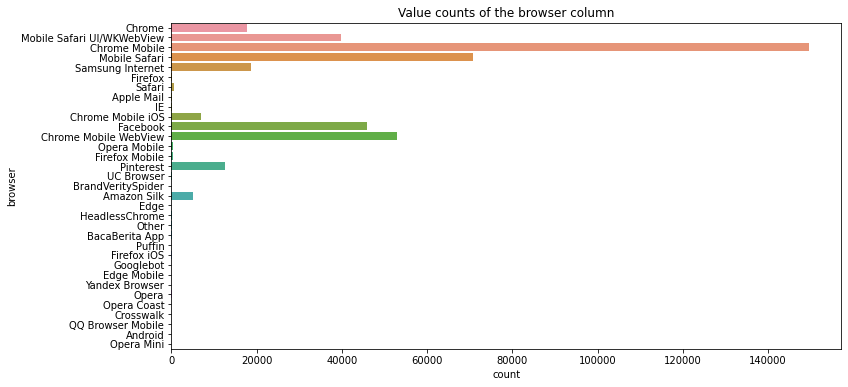

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='browser')
plt.title('Value counts of the browser column')
plt.show()

In [73]:
country_text = " ".join(str(country) for country in df['serving_locations'])

In [74]:
custom_stopwords = ['/n']
STOP_WORDS = STOPWORDS.union(custom_stopwords)

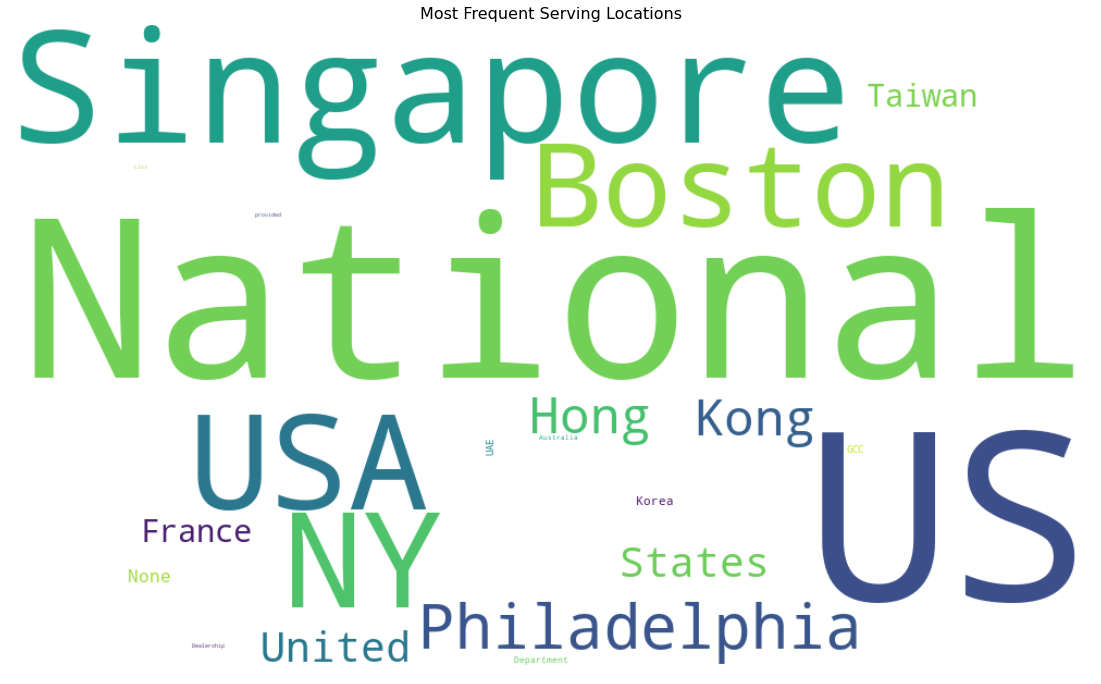

In [75]:
word_cloud = WordCloud(width=1000, height=600, collocations=False, background_color="white", stopwords=STOP_WORDS).generate(country_text)
plt.figure(figsize=(20, 12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Frequent Serving Locations', fontsize=16)
plt.show()